<a href="https://colab.research.google.com/github/SkyRocketash/medical-charges/blob/main/Copy_of_spam_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("spam_ham_dataset.csv.zip")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df=df.drop_duplicates()
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df['label_num'].value_counts()

,count
label_num,
0,3672
1,1499


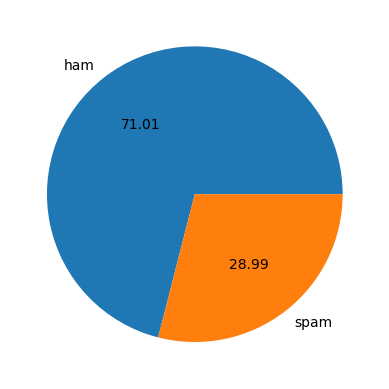

In [7]:
plt.pie(df["label_num"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [8]:
df['num_char']=df['text'].apply(lambda x:len(x))
df.head()

,Unnamed: 0,label,text,label_num,num_char
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [11]:
df.head()


,Unnamed: 0,label,text,label_num,num_char,num_words,num_sent
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


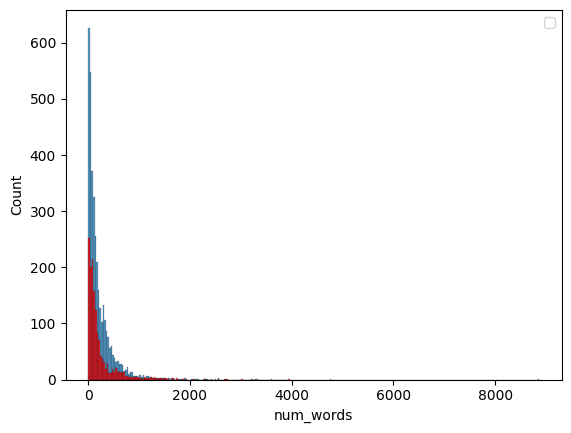

In [12]:
#plt.figure(figsize=(5,6))
sns.histplot(df[df['label_num']==0]['num_words'])
sns.histplot(df[df['label_num']==1]['num_words'],color='red')
plt.legend(loc='upper right')


<Axes: xlabel='num_char', ylabel='Count'>

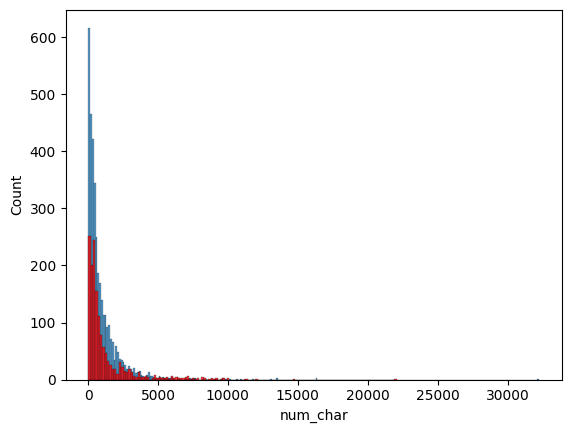

In [13]:
sns.histplot(df[df['label_num']==0]['num_char'])
sns.histplot(df[df['label_num']==1]['num_char'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

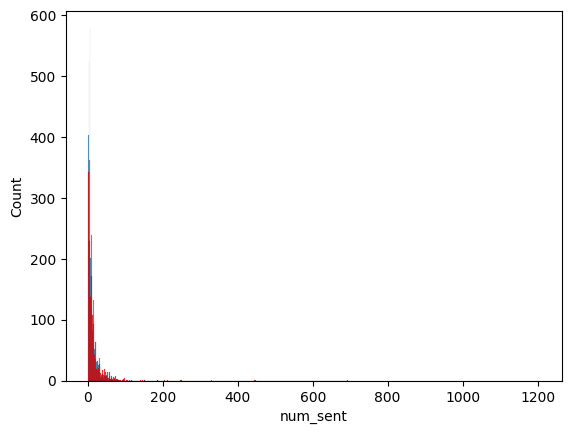

In [14]:
sns.histplot(df[df['label_num']==0]['num_sent'])
sns.histplot(df[df['label_num']==1]['num_sent'],color='red')

In [15]:
from nltk.stem.porter import PorterStemmer
import string
ps=PorterStemmer()
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords

In [17]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    if i in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [18]:

df['transform_text']=df['text'].apply(transform_text)

In [19]:
df.head()

,Unnamed: 0,label,text,label_num,num_char,num_words,num_sent,transform_text
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,thi is a up to the i you on by s to you can fr...
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,for
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,we re to that most of the i that thi of is and...
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,re thi is to the it is my that just a i haven ...


In [20]:
df['transform_text']

,transform_text
0,thi is a up to the i you on by s to you can fr...
1,for
2,we re to that most of the i that thi of is and...
3,
4,re thi is to the it is my that just a i haven ...
...,...
5166,the on the the from to all should be on by on ...
5167,and can t the d over the we ll but for now the...
5168,as i we to the thi but are i will you a
5169,for are the for there are the is and will be t...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [22]:
cv= CountVectorizer()
tfv=TfidfVectorizer()

In [23]:
x = tfv.fit_transform(df['transform_text']).toarray()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, df['label_num'], test_size=0.3, random_state=0)

In [25]:

models=[(GaussianNB,GaussianNB()),(MultinomialNB,MultinomialNB()),(BernoulliNB,BernoulliNB())]
for name, model in models:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(f"{name}, accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"{name}, confusion matrix: {confusion_matrix(y_test, y_pred)}")
  print(f"{name}, precision: {precision_score(y_test, y_pred)}")

<class 'sklearn.naive_bayes.GaussianNB'>, accuracy: 0.7951030927835051
<class 'sklearn.naive_bayes.GaussianNB'>, confusion matrix: [[1061   67]
 [ 251  173]]
<class 'sklearn.naive_bayes.GaussianNB'>, precision: 0.7208333333333333
<class 'sklearn.naive_bayes.MultinomialNB'>, accuracy: 0.833118556701031
<class 'sklearn.naive_bayes.MultinomialNB'>, confusion matrix: [[1106   22]
 [ 237  187]]
<class 'sklearn.naive_bayes.MultinomialNB'>, precision: 0.8947368421052632
<class 'sklearn.naive_bayes.BernoulliNB'>, accuracy: 0.8653350515463918
<class 'sklearn.naive_bayes.BernoulliNB'>, confusion matrix: [[1020  108]
 [ 101  323]]
<class 'sklearn.naive_bayes.BernoulliNB'>, precision: 0.7494199535962877


using multiple models


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [27]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [28]:
clfs = [
    ('SVC' , svc),
    ('KN' , knc),
    ('NB', mnb),
    ('DT', dtc),
    ('LR', lrc),
    ('RF', rfc),
    ('AdaBoost', abc),
    ('BgC', bc),
    ('ETC', etc),
    ('GBDT',gbdt),
    ('xgb', xgb)
]


In [29]:
accuracy=[]
precision=[]
for name, model in clfs:
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(f"{name}, accuracy: {accuracy_score(y_test, y_pred)}")
  accuracy.append(accuracy_score(y_test, y_pred))
  print(f"{name}, precision: {precision_score(y_test, y_pred)}")
  precision.append(precision_score(y_test, y_pred))
  print(f"{name}, confusion matrix: {confusion_matrix(y_test, y_pred)}")

SVC, accuracy: 0.8311855670103093
SVC, precision: 0.7025
SVC, confusion matrix: [[1009  119]
 [ 143  281]]
KN, accuracy: 0.8762886597938144
KN, precision: 0.8169398907103825
KN, confusion matrix: [[1061   67]
 [ 125  299]]
NB, accuracy: 0.833118556701031
NB, precision: 0.8947368421052632
NB, confusion matrix: [[1106   22]
 [ 237  187]]
DT, accuracy: 0.8157216494845361
DT, precision: 0.6402439024390244
DT, confusion matrix: [[951 177]
 [109 315]]
LR, accuracy: 0.8737113402061856
LR, precision: 0.7602739726027398
LR, confusion matrix: [[1023  105]
 [  91  333]]
RF, accuracy: 0.9091494845360825
RF, precision: 0.8919667590027701
RF, confusion matrix: [[1089   39]
 [ 102  322]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost, accuracy: 0.8724226804123711
AdaBoost, precision: 0.7579908675799086
AdaBoost, confusion matrix: [[1022  106]
 [  92  332]]
BgC, accuracy: 0.8930412371134021
BgC, precision: 0.8359375
BgC, confusion matrix: [[1065   63]
 [ 103  321]]
ETC, accuracy: 0.9001288659793815
ETC, precision: 0.8853868194842407
ETC, confusion matrix: [[1088   40]
 [ 115  309]]
GBDT, accuracy: 0.8807989690721649
GBDT, precision: 0.8040712468193384
GBDT, confusion matrix: [[1051   77]
 [ 108  316]]
xgb, accuracy: 0.9027061855670103
xgb, precision: 0.819672131147541
xgb, confusion matrix: [[1051   77]
 [  74  350]]


In [30]:
performence_df=pd.DataFrame({'Algorithm':[clf[0] for clf in clfs],'accuracy':accuracy,'precision':precision}).sort_values('accuracy',ascending=False)

In [31]:
performence_df

,Algorithm,accuracy,precision
5,RF,0.909149,0.891967
10,xgb,0.902706,0.819672
8,ETC,0.900129,0.885387
7,BgC,0.893041,0.835938
9,GBDT,0.880799,0.804071
1,KN,0.876289,0.816940
4,LR,0.873711,0.760274
6,AdaBoost,0.872423,0.757991
2,NB,0.833119,0.894737
0,SVC,0.831186,0.702500
